### Try to find a faster training method

In [1]:
%run StyleTransfer.py

In [2]:
import cv2

In [3]:
video_path = "videoplayback.webm"
style_path = "blue-and-red-abstract-painting-1799912.jpg"
cap = cv2.VideoCapture(video_path)

In [4]:
for _ in range(500):
    _, _ = cap.read()

In [5]:
_, frame = cap.read()

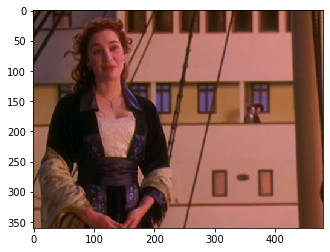

In [6]:
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame)
plt.show()

### Original Setting for Comparison 

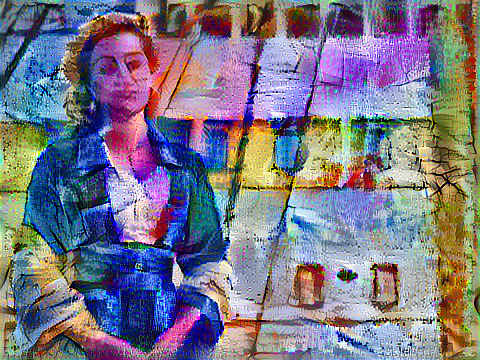

Train Step: 1000
Total Time: 97.0


In [7]:
tf.keras.backend.clear_session()
model = StyleTransfer(frame, style_path, video=True)
opt = tf.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)
model.transfer(opt)

### Choose a better weight

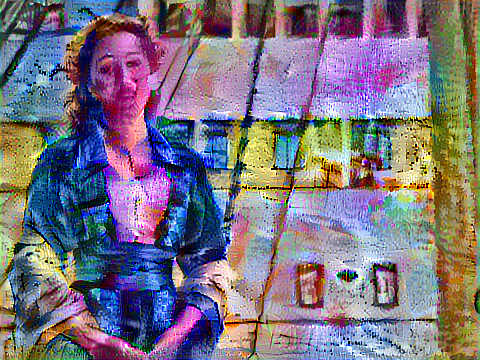

Train Step: 500
Total Time: 47.2


In [8]:
tf.keras.backend.clear_session()
model = StyleTransfer(frame, style_path, video=True)
opt = tf.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)
model.transfer(opt, epochs=5, style_weight=1e-3, content_weight=1e4)

### Decrease Epochs and Increase Learning Rate

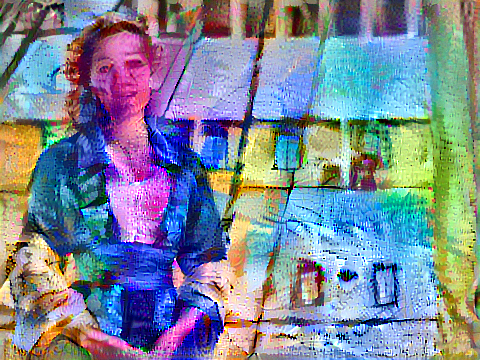

Train Step: 500
Total Time: 47.5


In [9]:
tf.keras.backend.clear_session()
model = StyleTransfer(frame, style_path, video=True)
opt = tf.optimizers.Adam(learning_rate=0.05, beta_1=0.99, epsilon=1e-1)
model.transfer(opt, epochs=5, style_weight=1e-3, content_weight=1e4)

### Decrease Style Layers

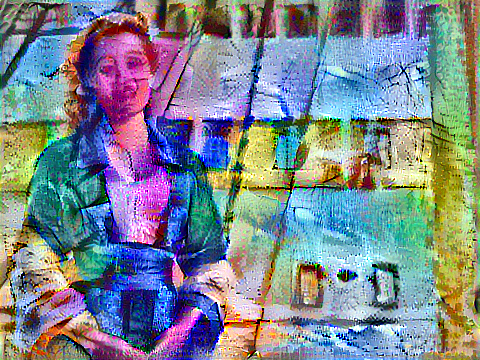

Train Step: 500
Total Time: 43.1


In [10]:
tf.keras.backend.clear_session()
model = StyleTransfer(frame, style_path, video=True, style_layers=["block3_conv1","block4_conv1"])
opt = tf.optimizers.Adam(learning_rate=0.04, beta_1=0.99, epsilon=1e-1)
model.transfer(opt, epochs=5, style_weight=1e-3, content_weight=1e4)

### Load Style Layers Once Method Update

In [11]:
%run StyleTransfer.py

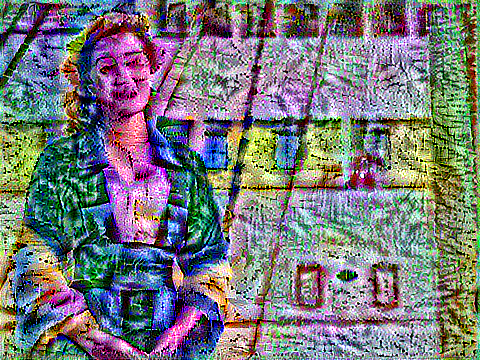

Train Step: 100
Total Time: 8.5


In [12]:
tf.keras.backend.clear_session()
model = StyleTransfer(frame, style_path, video=True, style_layers=["block3_conv1","block4_conv1"])
opt = tf.optimizers.Adam(learning_rate=0.04, beta_1=0.99, epsilon=1e-1)
model.transfer(opt, epochs=1, style_weight=1e-3, content_weight=1e4)

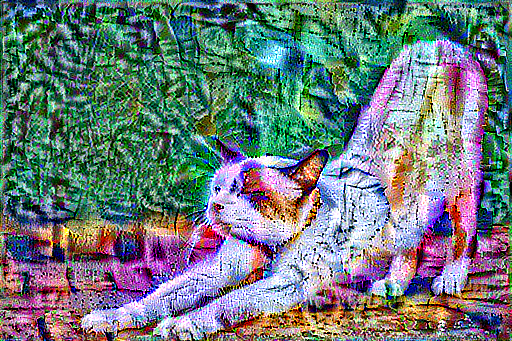

Train Step: 100
Total Time: 9.3


In [13]:
tf.keras.backend.clear_session()
model.update_content("stretching-white-cat-979247.jpg")
opt = tf.optimizers.Adam(learning_rate=0.04, beta_1=0.99, epsilon=1e-1)
model.transfer(opt, epochs=1, style_weight=1e-3, content_weight=1e4)

### After Update, VGG19 Loading Calls are Decreased !